In [47]:
import pandas as pd
import numpy as np

# Limpieza de datos
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from pattern.text.en import singularize, lemma
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Modelos
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

# Unificando data

In [2]:
data1 = pd.read_csv("./completeSpamAssassin.csv", usecols=lambda x: 'Unnamed' not in x)
data1.head()

,Body,Label
0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,##############################################...,1
4,I thought you might like these:\r\n1) Slim Dow...,1


In [3]:
data2 = pd.read_csv("./enronSpamSubset.csv", usecols=lambda x: 'Unnamed' not in x)
data2.head()

,Body,Label
0,Subject: stock promo mover : cwtd\r\n * * * ur...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [4]:
data = pd.concat([data1, data2])
data.head()

,Body,Label
0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,##############################################...,1
4,I thought you might like these:\r\n1) Slim Dow...,1


In [5]:
print(len(data1))
print(len(data2))
print(len(data))

6046
10000
16046


In [6]:
data = data.dropna()

# Limpiando data

In [7]:
cachedStopWords = stopwords.words('english')
def removeStepWords(value):
  return ' '.join([word for word in value.split() if word not in cachedStopWords])

data["Body"] = data["Body"].apply(removeStepWords)

In [8]:
def parseLemma(value):
  try:
    return lemma(value)
  except:
    return value

def sentenceToPresent(value):
  items = value.split(' ')
  for item in items:
    present = parseLemma(item)
    value = value.replace(item, present)
  return value

data["Body"] = data["Body"].apply(sentenceToPresent)

In [9]:
def toSingular(value):
  try:
    return singularize(value)
  except:
    return value
    
def sentenceToSingular(value):
  items = value.split(' ')
  for item in items:
    singular = toSingular(item)
    value = value.replace(item, singular)
  return value

data["Body"] = data["Body"].apply(sentenceToSingular)

In [10]:
def removeSpecialChars(value):
    ayuda = re.sub(r"[^a-zA-Z ]",' ', value.lower())
    return ayuda

data["Body"] = data["Body"].apply(removeSpecialChars)

In [11]:
def removeExtraSpaces(value):
    return re.sub('  +', ' ', value) 

data["Body"] = data["Body"].apply(removeExtraSpaces)

In [12]:
def removeLinks(value):
  if ('http' not in value): return value
  links = re.findall(r"http[^\s]*", value, re.I)
  for link in links:
    value = value.replace(link, '')
  return value

data["Body"] = data["Body"].apply(removeExtraSpaces)

In [13]:
data.drop(data[data["Body"] == "empty"].index, inplace=True)

In [14]:
data.head()

,Body,Label
0,save life insurance why spend more than you ha...,1
1,fight the risk cancer http www adclick ws p c...,1
2,fight the risk cancer http www adclick ws p c...,1
3,adult club offer free membership instant acce...,1
4,i think might like these slim down guarantee l...,1


# Wordcloud

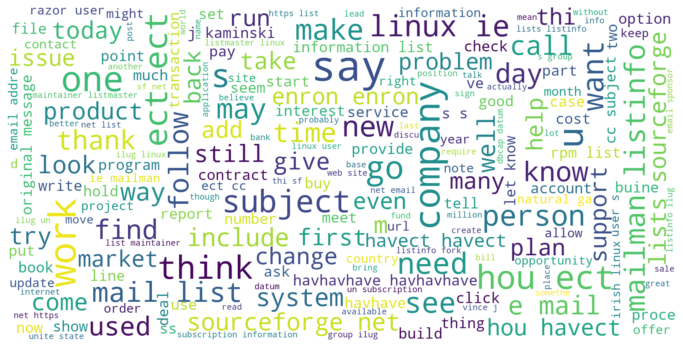

In [15]:
# wordcloud 
body_strings = data["Body"].to_list()
body_strings = pd.Series(body_strings).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(body_strings)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Modelos

In [53]:
naive = MultinomialNB()

## Modelo Bag of N - grams

In [23]:
dataBodyList = data["Body"].to_list()

In [49]:
bv = CountVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1,2))
bv_matrix = bv.fit_transform(dataBodyList)
bv_matrix = bv_matrix.toarray()
vocabulario = bv.get_feature_names()
df_bv = pd.DataFrame(bv_matrix, columns=vocabulario)
df_bv

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,act,add,addres,all,allow,also,and,another,around,...,work,world,would,would like,write,wrote,www,year,ymy,you
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,1,1
3,1,0,0,0,1,1,0,2,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14975,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14976,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14977,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X = bv_matrix
y = data['Label']
print (X.shape) 
print (y.shape) 

(14979, 251)
(14979,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [46]:
classifier = naive.fit(X_train,y_train)
y_preds = classifier.predict(X_test)

In [50]:
result_arbol = confusion_matrix(y_test, y_preds)

print("TP: ", result_arbol[0][0])
print("FP: ", result_arbol[0][1])
print("FN: ", result_arbol[1][0])
print("TN: ", result_arbol[1][1])

result_arbol

TP:  2406
FP:  258
FN:  337
TN:  1493


array([[2406,  258],
       [ 337, 1493]], dtype=int64)

In [51]:
print ('Accuracy:', accuracy_score(y_test, y_preds))
print ("Precision:", precision_score(y_test, y_preds))
print ("Recall: ", recall_score(y_test, y_preds))
print ("F1: ", f1_score(y_test, y_preds))

Accuracy: 0.867601246105919
Precision: 0.8526556253569388
Recall:  0.8158469945355191
F1:  0.8338452946104439


## TF-IDF

In [58]:
tv = TfidfVectorizer(min_df=0.05, max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(dataBodyList)
tv_matrix = tv_matrix.toarray()
vocabulario = tv.get_feature_names()
df_tf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocabulario)
df_tf

c:\Users\Brand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,act,add,addres,all,allow,also,and,another,around,...,without,work,world,would,write,wrote,www,year,ymy,you
0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.18,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.10,0.16
1,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.45,0.0,0.10,0.08
2,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.60,0.0,0.16,0.13
3,0.05,0.0,0.00,0.00,0.05,0.06,0.00,0.11,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.24,0.05
4,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.34,0.0,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14974,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00
14975,0.00,0.0,0.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00
14976,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.04,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00
14977,0.00,0.0,0.33,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00


In [52]:
X = tv_matrix
print (X.shape) 
print (y.shape) 

(14979, 245)
(14979,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [55]:
classifier = naive.fit(X_train,y_train)
y_preds = classifier.predict(X_test)

In [56]:
result_arbol = confusion_matrix(y_test, y_preds)

print("TP: ", result_arbol[0][0])
print("FP: ", result_arbol[0][1])
print("FN: ", result_arbol[1][0])
print("TN: ", result_arbol[1][1])

result_arbol

TP:  2469
FP:  195
FN:  303
TN:  1527


array([[2469,  195],
       [ 303, 1527]], dtype=int64)

In [57]:
print ('Accuracy:', accuracy_score(y_test, y_preds))
print ("Precision:", precision_score(y_test, y_preds))
print ("Recall: ", recall_score(y_test, y_preds))
print ("F1: ", f1_score(y_test, y_preds))

Accuracy: 0.8891855807743658
Precision: 0.8867595818815331
Recall:  0.8344262295081967
F1:  0.8597972972972973
